Test R notebook

Validate assumptions for mixed-effects model with [this](https://ademos.people.uic.edu/Chapter18.html).


- try things with python first and then verify with R?

In [1]:
library(lme4)
library(AER)
library(dplyr)
library(purrr)
library(magrittr)
library(ggplot2)

data <- read.csv("../../data/processed/60b37265a9f60881975de69e-reshare_rates.csv")
head(data)

Loading required package: Matrix

Loading required package: car

Loading required package: carData

Registered S3 methods overwritten by 'car':
  method                          from
  influence.merMod                lme4
  cooks.distance.influence.merMod lme4
  dfbeta.influence.merMod         lme4
  dfbetas.influence.merMod        lme4

Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: survival


Attaching package: ‘dplyr’


The following object is masked from ‘package:car’:

    recode


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘purrr’


The following object is masked from ‘package:car’:

    some



Attaching package: ‘magrittr’


The following obj

,user_id,consent,timeSubmitted,educationLevel,politicalAffiliation,attendsProtests,age,gender_man,gender_nonBinary,gender_woman,⋯,socialMedias_snapchat,socialMedias_tiktok,socialMedias_twitter,condition,evidence,Affirms,Denies,Neutral,Questions,rumour_proportion
,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-9.144978e+18,1,2021-06-03 16:48:06.687000+00:00,communityCollege,none,False,26,1,0,0,⋯,0,1,0,Control,High,0.5,0.0,0.5,0.00,1
2,-9.144978e+18,1,2021-06-03 16:48:06.687000+00:00,communityCollege,none,False,26,1,0,0,⋯,0,1,0,Control,Low,0.0,0.5,0.0,0.75,0
3,-9.093245e+18,1,2021-06-03 14:24:49.108000+00:00,communityCollege,centreLeft,False,28,0,0,1,⋯,0,0,0,Control,High,0.0,0.3,0.0,0.75,0
4,-9.093245e+18,1,2021-06-03 14:24:49.108000+00:00,communityCollege,centreLeft,False,28,0,0,1,⋯,0,0,0,Control,Low,0.0,0.2,0.5,0.00,0
5,-8.895085e+18,1,2021-06-03 14:19:19.410000+00:00,undergrad,none,False,29,0,0,1,⋯,1,1,0,Treatment,High,0.0,0.2,0.0,0.00,0
6,-8.895085e+18,1,2021-06-03 14:19:19.410000+00:00,undergrad,none,False,29,0,0,1,⋯,1,1,0,Treatment,Low,0.0,0.3,0.0,0.00,0


## H1 and H3

In [2]:
md.affirms <- lmer(Affirms ~ condition * evidence + (1 | user_id), data = data)
summary(md.affirms)

Linear mixed model fit by REML ['lmerMod']
Formula: Affirms ~ condition * evidence + (1 | user_id)
   Data: data

REML criterion at convergence: -110.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9267 -0.4987 -0.1251  0.3392  2.4317 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.01782  0.1335  
 Residual             0.01117  0.1057  
Number of obs: 136, groups:  user_id, 68

Fixed effects:
                                Estimate Std. Error t value
(Intercept)                     0.157895   0.027618   5.717
conditionTreatment              0.008772   0.041581   0.211
evidenceLow                    -0.039474   0.024241  -1.628
conditionTreatment:evidenceLow -0.030526   0.036496  -0.836

Correlation of Fixed Effects:
            (Intr) cndtnT evdncL
cndtnTrtmnt -0.664              
evidenceLow -0.439  0.291       
cndtnTrtm:L  0.291 -0.439 -0.664

**Satterthwaite approximation for p-values**

In [3]:
coefs <- data.frame(coef(summary(md.affirms)))
# get Satterthwaite-approximated degrees of freedom
coefs$df.Satt <- coef(summary(md.affirms))
# get approximate p-values
coefs$p.Satt <- coef(summary(md.affirms))[, 2]
coefs

,Estimate,Std..Error,t.value,df.Satt,p.Satt
,<dbl>,<dbl>,<dbl>,"<dbl[,3]>",<dbl>
(Intercept),0.15789474,0.02761835,5.7170231,"0.15789474, 0.02761835, 5.7170231",0.02761835
conditionTreatment,0.00877193,0.04158067,0.2109617,"0.00877193, 0.04158067, 0.2109617",0.04158067
evidenceLow,-0.03947368,0.02424119,-1.6283723,"-0.03947368, 0.02424119, -1.6283723",0.02424119
conditionTreatment:evidenceLow,-0.03052632,0.03649621,-0.8364242,"-0.03052632, 0.03649621, -0.8364242",0.03649621


In [4]:
anova(md.affirms)

,npar,Sum Sq,Mean Sq,F value
,<int>,<dbl>,<dbl>,<dbl>
condition,1,0.0003370098,0.0003370098,0.03018429
evidence,1,0.0952941176,0.0952941176,8.53502088
condition:evidence,1,0.0078111455,0.0078111455,0.69960551


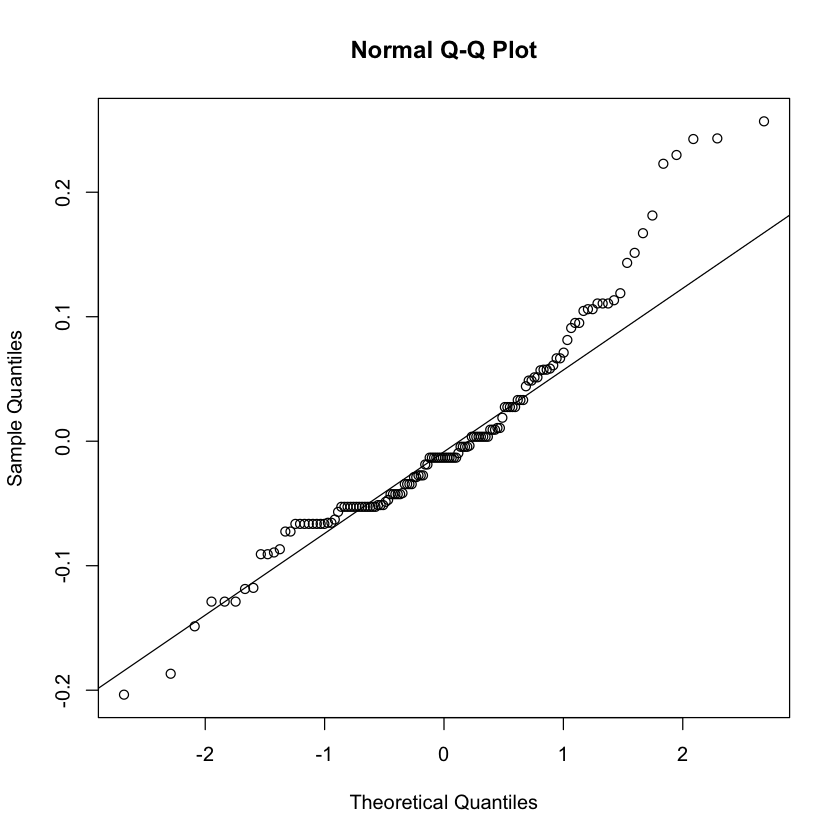

In [5]:
qqnorm(resid(md.affirms))
qqline(resid(md.affirms))  # points fall nicely onto the line - good!

In [6]:
confint(md.affirms)

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,0.10357362,0.164736759
.sigma,0.08878278,0.124384628
(Intercept),0.10403917,0.211750299
conditionTreatment,-0.07231006,0.089853919
evidenceLow,-0.08695052,0.008003152
conditionTreatment:evidenceLow,-0.10200484,0.040952211


lattice theme set by effectsTheme()
See ?effectsTheme for details.



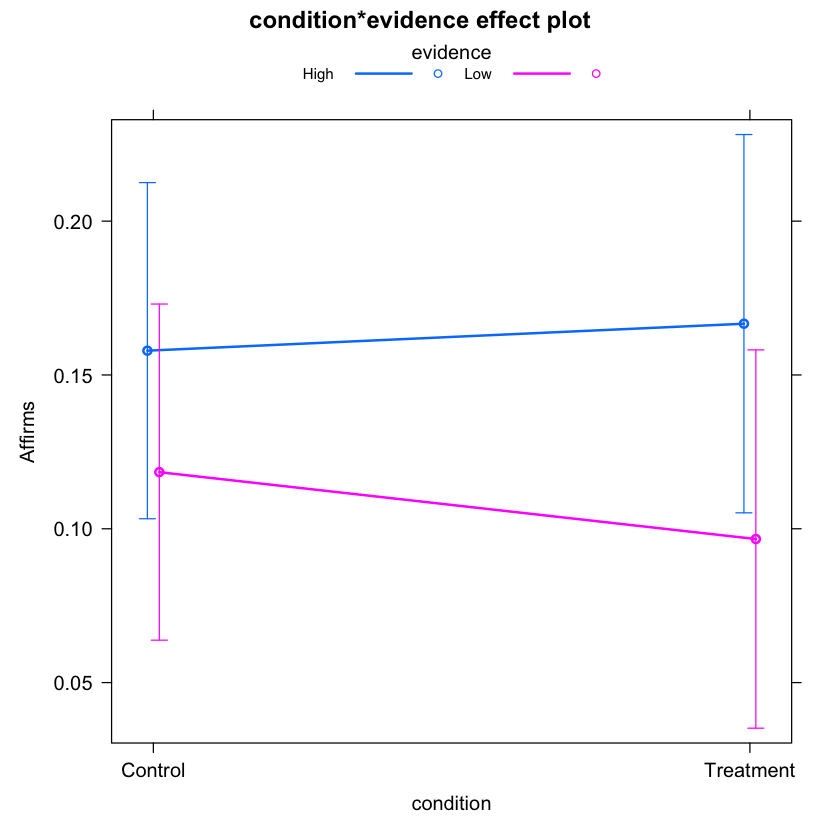

In [7]:
library(effects)
plot(allEffects(md.affirms), multiline=TRUE, ci.style="bars")

## H2 and H4

In [8]:
md.denies <- lmer(Denies ~ condition * evidence + (1 | user_id), data = data)
summary(md.denies)

Linear mixed model fit by REML ['lmerMod']
Formula: Denies ~ condition * evidence + (1 | user_id)
   Data: data

REML criterion at convergence: -55.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8873 -0.4893 -0.2494  0.4543  3.2267 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.00407  0.0638  
 Residual             0.03063  0.1750  
Number of obs: 136, groups:  user_id, 68

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                    0.084211   0.030218   2.787
conditionTreatment             0.009123   0.045495   0.201
evidenceLow                    0.136842   0.040151   3.408
conditionTreatment:evidenceLow 0.149825   0.060449   2.479

Correlation of Fixed Effects:
            (Intr) cndtnT evdncL
cndtnTrtmnt -0.664              
evidenceLow -0.664  0.441       
cndtnTrtm:L  0.441 -0.664 -0.664

**Satterthwaite approximation for p-values**

In [9]:
coefs <- data.frame(coef(summary(md.denies)))
# get Satterthwaite-approximated degrees of freedom
coefs$df.Satt <- coef(summary(md.denies))
# get approximate p-values
coefs$p.Satt <- coef(summary(md.denies))[, 2]
coefs

,Estimate,Std..Error,t.value,df.Satt,p.Satt
,<dbl>,<dbl>,<dbl>,"<dbl[,3]>",<dbl>
(Intercept),0.084210526,0.03021834,2.7867356,"0.084210526, 0.03021834, 2.7867356",0.03021834
conditionTreatment,0.009122807,0.04549508,0.2005229,"0.009122807, 0.04549508, 0.2005229",0.04549508
evidenceLow,0.136842105,0.04015067,3.4082146,"0.136842105, 0.04015067, 3.4082146",0.04015067
conditionTreatment:evidenceLow,0.149824561,0.06044866,2.4785425,"0.149824561, 0.06044866, 2.4785425",0.06044866


In [10]:
anova(md.denies)

,npar,Sum Sq,Mean Sq,F value
,<int>,<dbl>,<dbl>,<dbl>
condition,1,0.1870652,0.1870652,6.107362
evidence,1,1.4002941,1.4002941,45.717242
condition:evidence,1,0.1881620,0.1881620,6.143173


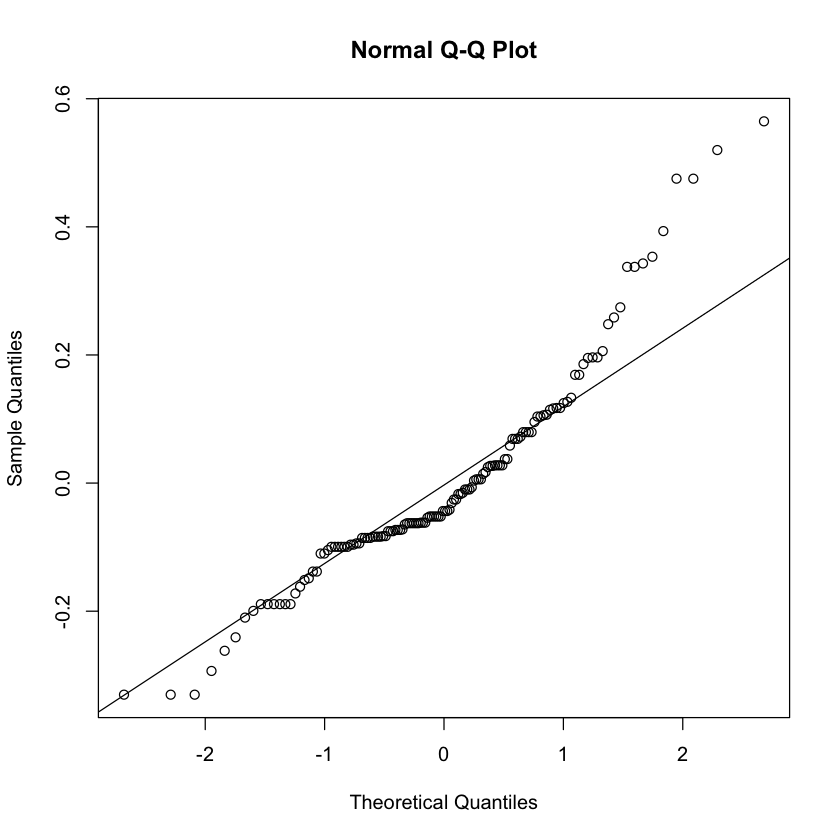

In [11]:
qqnorm(resid(md.denies))
qqline(resid(md.denies))  # points fall nicely onto the line - good!

In [12]:
confint(md.denies)

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,0.00000000,0.11402079
.sigma,0.14705088,0.20425421
(Intercept),0.02544074,0.14298031
conditionTreatment,-0.07935777,0.09760338
evidenceLow,0.05820618,0.21547803
conditionTreatment:evidenceLow,0.03143461,0.26821451


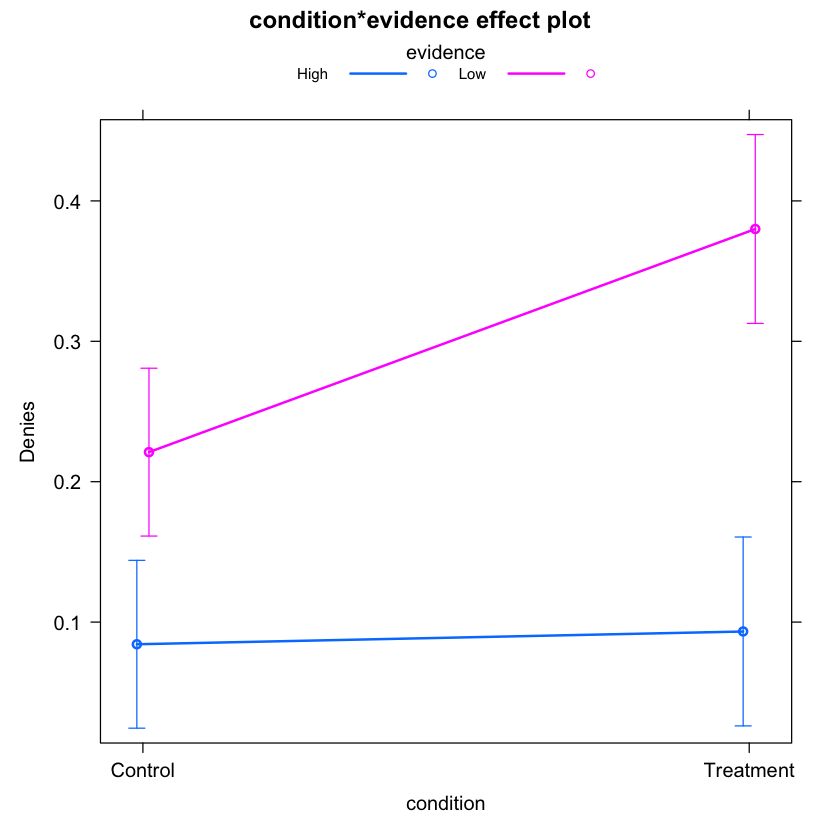

In [13]:
library(effects)
plot(allEffects(md.denies), multiline=TRUE, ci.style="bars")